# Data Imputation
    Imputation is the process of replacing missing data with substituted values.



In [22]:
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
import sys
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
import pandas as pd
from numpy import isnan
import numpy as np

# Statistical Imputation
    The values may be missing completely or may be marked with a special charater for this data set missing 
    values are marked by "?".
## Common statistics calculated include:

 * The column mean value.
 * The column median value.
 * The column mode value.
 * A constant value.

## Filling "?" with NaN
    We can load the dataset using the read_csv() Pandas function and specify the “na_values” to load values of ‘?‘ as missing, marked with a NaN value.

In [4]:
df = pd.read_csv("HorseColic.csv",header=None, na_values="?")
print(df.head())

0   1        2     3      4     5    6    7    8    9   ...    18    19  \
0  2.0   1   530101  38.5   66.0  28.0  3.0  3.0  NaN  2.0  ...  45.0   8.4   
1  1.0   1   534817  39.2   88.0  20.0  NaN  NaN  4.0  1.0  ...  50.0  85.0   
2  2.0   1   530334  38.3   40.0  24.0  1.0  1.0  3.0  1.0  ...  33.0   6.7   
3  1.0   9  5290409  39.1  164.0  84.0  4.0  1.0  6.0  2.0  ...  48.0   7.2   
4  2.0   1   530255  37.3  104.0  35.0  NaN  NaN  6.0  2.0  ...  74.0   7.4   

    20   21   22  23     24  25  26  27  
0  NaN  NaN  2.0   2  11300   0   0   2  
1  2.0  2.0  3.0   2   2208   0   0   2  
2  NaN  NaN  1.0   2      0   0   0   1  
3  3.0  5.3  2.0   1   2208   0   0   1  
4  NaN  NaN  2.0   2   4300   0   0   2  

[5 rows x 28 columns]


## Complete Case Analysis
 * Here the rows with miising values are removed. It can be used for both numerical and categorical values.
 
 * Running the below code resulted in only 6 rows which are complete(without any missing values) so, not so efficient for my data set. 

In [14]:
print("Before Imputation",df.shape)
df1 = df.dropna()
print("After Imputation",df1.shape)

Before Imputation (300, 28)
After Imputation (6, 28)


## Missing Category Imputation
 * Missing categories are grouped under one label called Missing.
 
 * This method mainly used for categorical values and not for numerical values. 

In [24]:
df_missing = df
print("Missing values: \n",df_missing.head())
df_missing.replace({np.nan: 'Missing'},regex=False,inplace=True)
print("After replacing with 'Missing' keyword: \n",df_missing.head())

Missing values: 
     0   1        2     3      4     5        6        7        8    9   ...  \
0  2.0   1   530101  38.5   66.0  28.0      3.0      3.0  Missing  2.0  ...   
1  1.0   1   534817  39.2   88.0  20.0  Missing  Missing      4.0  1.0  ...   
2  2.0   1   530334  38.3   40.0  24.0      1.0      1.0      3.0  1.0  ...   
3  1.0   9  5290409  39.1  164.0  84.0      4.0      1.0      6.0  2.0  ...   
4  2.0   1   530255  37.3  104.0  35.0  Missing  Missing      6.0  2.0  ...   

     18    19       20       21   22 23     24 25 26 27  
0  45.0   8.4  Missing  Missing  2.0  2  11300  0  0  2  
1  50.0  85.0      2.0      2.0  3.0  2   2208  0  0  2  
2  33.0   6.7  Missing  Missing  1.0  2      0  0  0  1  
3  48.0   7.2      3.0      5.3  2.0  1   2208  0  0  1  
4  74.0   7.4  Missing  Missing  2.0  2   4300  0  0  2  

[5 rows x 28 columns]
After replacing with 'Missing' keyword: 
     0   1        2     3      4     5        6        7        8    9   ...  \
0  2.0   1   53

## Mean
 * Running the below code first loads the dataset and reports the total number of missing values in the dataset as 1,605.

 * The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected.

 * Each missing value was replaced with the mean value of its column.
  
 * The Result for 1 row is shown.

In [12]:

data = df.values
ix = [i for i in range(data.shape[1])]
X, y = data[:, ix], data[:, 23]

print('Missing: %d' % sum(isnan(X).flatten()))
print("1st Row with missing values: ")
print(X[0])

imputer = SimpleImputer(strategy='mean')

imputer.fit(X)

Xtrans = imputer.transform(X)
print("=======================================================================")
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print("1st Row after filling the values: ")
print(Xtrans[0])

Missing: 1605
1st Row with missing values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 2.00000e+00
 1.13000e+04 0.00000e+00 0.00000e+00 2.00000e+00]
Missing: 0
1st Row after filling the values: 
[2.00000000e+00 1.00000000e+00 5.30101000e+05 3.85000000e+01
 6.60000000e+01 2.80000000e+01 3.00000000e+00 3.00000000e+00
 2.85375494e+00 2.00000000e+00 5.00000000e+00 4.00000000e+00
 4.00000000e+00 1.75510204e+00 1.58247423e+00 4.70754717e+00
 3.00000000e+00 5.00000000e+00 4.50000000e+01 8.40000000e+00
 2.03703704e+00 3.01960784e+00 2.00000000e+00 2.00000000e+00
 1.13000000e+04 0.00000000e+00 0.00000000e+00 2.00000000e+00]


## Median
 * Running the below code first loads the dataset and reports the total number of missing values in the dataset as 1,605.

 * The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected.

 * Each missing value was replaced with the median value of its column.
  
 * The Result for 1 row is shown.

In [13]:

data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

print('Missing: %d' % sum(isnan(X).flatten()))
print("1st Row with missing values: ")
print(X[0])

imputer = SimpleImputer(strategy='median')

imputer.fit(X)

Xtrans = imputer.transform(X)
print("=======================================================================")
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print("1st Row after filling the values: ")
print(Xtrans[0])

Missing: 1605
1st Row with missing values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]
Missing: 0
1st Row after filling the values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00 3.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00 2.00000e+00 1.00000e+00 5.00000e+00 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00 2.00000e+00 2.25000e+00 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]


## Mode
 * Running the below code first loads the dataset and reports the total number of missing values in the dataset as 1,605.

 * The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected.

 * Each missing value was replaced with the mode value of its column.
  
 * The Result for 1 row is shown.

In [14]:

data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

print('Missing: %d' % sum(isnan(X).flatten()))
print("1st Row with missing values: ")
print(X[0])

imputer = SimpleImputer(strategy='most_frequent')

imputer.fit(X)

Xtrans = imputer.transform(X)
print("=======================================================================")
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print("1st Row after filling the values: ")
print(Xtrans[0])

Missing: 1605
1st Row with missing values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]
Missing: 0
1st Row after filling the values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00 1.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00 2.00000e+00 1.00000e+00 2.00000e+00 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00 2.00000e+00 2.00000e+00 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]


## Constant
 * Running the below code first loads the dataset and reports the total number of missing values in the dataset as 1,605.

 * The transform is configured, fit, and performed and the resulting new dataset has no missing values, confirming it was performed as we expected.

 * Each missing value was replaced with the 0.
  
 * The Result for 1 row is shown.

In [16]:
data = df.values
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

print('Missing: %d' % sum(isnan(X).flatten()))
print("1st Row with missing values: ")
print(X[0])

imputer = SimpleImputer(strategy='constant')

imputer.fit(X)

Xtrans = imputer.transform(X)
print("=======================================================================")
print('Missing: %d' % sum(isnan(Xtrans).flatten()))
print("1st Row after filling the values: ")
print(Xtrans[0])

Missing: 1605
1st Row with missing values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00         nan 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00         nan         nan         nan 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00         nan         nan 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]
Missing: 0
1st Row after filling the values: 
[2.00000e+00 1.00000e+00 5.30101e+05 3.85000e+01 6.60000e+01 2.80000e+01
 3.00000e+00 3.00000e+00 0.00000e+00 2.00000e+00 5.00000e+00 4.00000e+00
 4.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 3.00000e+00 5.00000e+00
 4.50000e+01 8.40000e+00 0.00000e+00 0.00000e+00 2.00000e+00 1.13000e+04
 0.00000e+00 0.00000e+00 2.00000e+00]


## Comparing Different Imputed Statistics
 * Running the example evaluates each statistical imputation strategy on the horse colic dataset using repeated cross-validation.
 
 * The mean accuracy of each strategy is reported along the way. The results suggest that using a constant value, e.g. 0, results in the best performance of about 88.1 percent, which is a good result.

 * Finally box and whisker plot is plotted for each set of results.
 
 * We can see that the distribution of accuracy scores for the constant strategy is better compared to to other strategies.
 * When it comes categorical values the best method is to go with median since it's second best after constant or mode. 

--->mean 0.858 (0.059)
--->median 0.859 (0.056)
--->most_frequent 0.874 (0.061)
--->constant 0.881 (0.041)


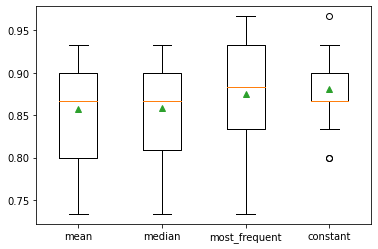

In [25]:
ix = [i for i in range(data.shape[1]) if i != 23]
X, y = data[:, ix], data[:, 23]

results = list()
strategies = ['mean', 'median', 'most_frequent', 'constant']
for s in strategies:
	pipeline = Pipeline(steps=[('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	results.append(scores)
	print('--->%s %.3f (%.3f)' % (s, mean(scores), std(scores)))

pyplot.boxplot(results, labels=strategies, showmeans=True)
pyplot.show()

# Data Set Description 
### Title 
Horse Colic database

### Number of Instances: 
368 (300 for training, 68 for testing)

### Number of attributes: 
28

### Attribute Information:

1) surgery:
   * 1 = Yes, it had surgery
   * 2 = It was treated without surgery

2) Age:
   * 1 = Adult horse
   * 2 = Young (< 6 months)

3) Hospital Number
   * numeric id
   * the case number assigned to the horse
     (may not be unique if the horse is treated > 1 time)

4) Rectal temperature:
   * linear
   * in degrees celsius.
   * An elevated temp may occur due to infection.
   * temperature may be reduced when the animal is in late shock
   * normal temp is 37.8
   * this parameter will usually change as the problem progresses
   * eg. may start out normal, then become elevated because of
                   the lesion, passing back through the normal range as the
                   horse goes into shock
                   
5) Pulse:
   * linear
   * the heart rate in beats per minute
   * is a reflection of the heart condition: 30 -40 is normal for adults
   * rare to have a lower than normal rate although athletic horses
   * may have a rate of 20-25
   * animals with painful lesions or suffering from circulatory shock
            may have an elevated heart rate

6) Respiratory rate:
   * linear
   * normal rate is 8 to 10
   * usefulness is doubtful due to the great fluctuations

7) Temperature of extremities:
   * a subjective indication of peripheral circulation
   * possible values:
     * 1 = Normal
     * 2 = Warm
     * 3 = Cool
     * 4 = Cold
   * cool to cold extremities indicate possible shock
   * hot extremities should correlate with an elevated rectal temp.

8) Peripheral pulse:
   * subjective
   * possible values are:
    * 1 = normal
    * 2 = increased
    * 3 = reduced
    * 4 = absent
   * normal or increased p.p. are indicative of adequate circulation
            while reduced or absent indicate poor perfusion
               
9) Mucous membranes:
   * a subjective measurement of colour
   * possible values are:
    * 1 = normal pink
    * 2 = bright pink
    * 3 = pale pink
    * 4 = pale cyanotic
    * 5 = bright red / injected
    * 6 = dark cyanotic
   * 1 and 2 probably indicate a normal or slightly increased circulation
   * 3 may occur in early shock
   * 4 and 6 are indicative of serious circulatory compromise

10) Capillary refill:
 * a clinical judgement. The longer the refill, the poorer the
            circulation
  * possible values
    * 1 = < 3 seconds
    * 2 = >= 3 seconds
   
11) Pain: 
 * a subjective judgement of the horse's pain level
 * possible values:
   * 1 = alert, no pain
   * 2 = depressed
   * 3 = intermittent mild pain
   * 4 = intermittent severe pain
   * 5 = continuous severe pain
 * should NOT be treated as a ordered or discrete variable!
 * In general, the more painful, the more likely it is to require
            surgery
     * prior treatment of pain may mask the pain level to some extent

12) Peristalsis:
 * an indication of the activity in the horse's gut. As the gut
   becomes more distended or the horse becomes more toxic, the
   activity decreases
 * possible values:
   * 1 = hypermotile
   * 2 = normal
   * 3 = hypomotile
   * 4 = absent

13) Abdominal distension:
 * An IMPORTANT parameter.
 * possible values
   * 1 = none
   * 2 = slight
   * 3 = moderate
   * 4 = severe
 * an animal with abdominal distension is likely to be painful and
 * have reduced gut motility.
 * a horse with severe abdominal distension is likely to require
            surgery just tio relieve the pressure

14) Nasogastric tube:
 * this refers to any gas coming out of the tube
 * possible values:
   * 1 = none
   * 2 = slight
   * 3 = significant
 * a large gas cap in the stomach is likely to give the horse
            discomfort

15) Nasogastric reflux:
 * possible values
   * 1 = none
   * 2 = > 1 liter
   * 3 = < 1 liter
 * the greater amount of reflux, the more likelihood that there is
            some serious obstruction to the fluid passage from the rest of
            the intestine

16) Nasogastric reflux PH:
 * linear
 * scale is from 0 to 14 with 7 being neutral
 * normal values are in the 3 to 4 range

17) rectal examination:
 * feces
 * possible values
   * 1 = normal
   * 2 = increased
   * 3 = decreased
   * 4 = absent
 * absent feces probably indicates an obstruction
    
18) Abdomen: 
 * possible values
   * 1 = normal
   * 2 = other
   * 3 = firm feces in the large intestine
   * 4 = distended small intestine
   * 5 = distended large intestine
 * 3 is probably an obstruction caused by a mechanical impaction
       and is normally treated medically
 * 4 and 5 indicate a surgical lesion

19) Packed cell volume:
 * linear
 * the # of red cells by volume in the blood
 * normal range is 30 to 50. The level rises as the circulation
        becomes compromised or as the animal becomes dehydrated.

20) Total protein
 * linear
 * normal values lie in the 6-7.5 (gms/dL) range
 * the higher the value the greater the dehydration

21) Abdominocentesis appearance:
 * a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity
 * possible values:
   * 1 = clear
   * 2 = cloudy
   * 3 = serosanguinous
 * normal fluid is clear while cloudy or serosanguinous indicates
        a compromised gut

22) Abdomcentesis total protein:
 * linear
 * the higher the level of protein the more likely it is to have a
        compromised gut. Values are in gms/dL

23) Outcome:
 * what eventually happened to the horse?
 * possible values:
   * 1 = lived
   * 2 = died
   * 3 = was euthanized

24) Surgical lesion:
 * retrospectively, was the problem (lesion) surgical?
 * all cases are either operated upon or autopsied so that
        this value and the lesion type are always known
 * possible values:
   * 1 = Yes
   * 2 = No

25 26, 27 Type of lesion
 * first number is site of lesion
   * 1 = gastric
   * 2 = sm intestine
   * 3 = lg colon
   * 4 = lg colon and cecum
   * 5 = cecum
   * 6 = transverse colon
   * 7 = retum/descending colon
   * 8 = uterus
   * 9 = bladder
   * 11 = all intestinal sites
   * 00 = none
 * second number is type
   * 1 = simple
   * 2 = strangulation
   * 3 = inflammation
   * 4 = other
 * third number is subtype
   * 1 = mechanical
   * 2 = paralytic
   * 0 = n/a
 * fourth number is specific code
   * 1 = obturation
   * 2 = intrinsic
   * 3 = extrinsic
   * 4 = adynamic
   * 5 = volvulus/torsion
   * 6 = intussuption
   * 7 = thromboembolic
   * 8 = hernia
   * 9 = lipoma/slenic incarceration
   * 10 = displacement
   * 0 = n/a
           
28) Cp_data:
 * is pathology data present for this case?
   * 1 = Yes
   * 2 = No
 * this variable is of no significance since pathology data
            is not included or collected for these cases

### Missing values: 
30% of the values are missing